<a href="https://colab.research.google.com/github/akicharu16/intern/blob/main/intern_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


Epoch 1/50
76/76 [==============================] - 2s 6ms/step - loss: 0.0040
Epoch 2/50
76/76 [==============================] - 0s 6ms/step - loss: 1.6795e-04
Epoch 3/50
76/76 [==============================] - 0s 6ms/step - loss: 3.0369e-05
Epoch 4/50
76/76 [==============================] - 0s 6ms/step - loss: 2.9118e-05
Epoch 5/50
76/76 [==============================] - 0s 6ms/step - loss: 2.8117e-05
Epoch 6/50
76/76 [==============================] - 0s 6ms/step - loss: 2.8593e-05
Epoch 7/50
76/76 [==============================] - 0s 6ms/step - loss: 2.7098e-05
Epoch 8/50
76/76 [==============================] - 0s 6ms/step - loss: 2.7373e-05
Epoch 9/50
76/76 [==============================] - 0s 6ms/step - loss: 2.8795e-05
Epoch 10/50
76/76 [==============================] - 1s 9ms/step - loss: 2.6315e-05
Epoch 11/50
76/76 [==============================] - 1s 9ms/step - loss: 2.7532e-05
Epoch 12/50
76/76 [==============================] - 1s 9ms/step - loss: 2.5991e-05
Epoch

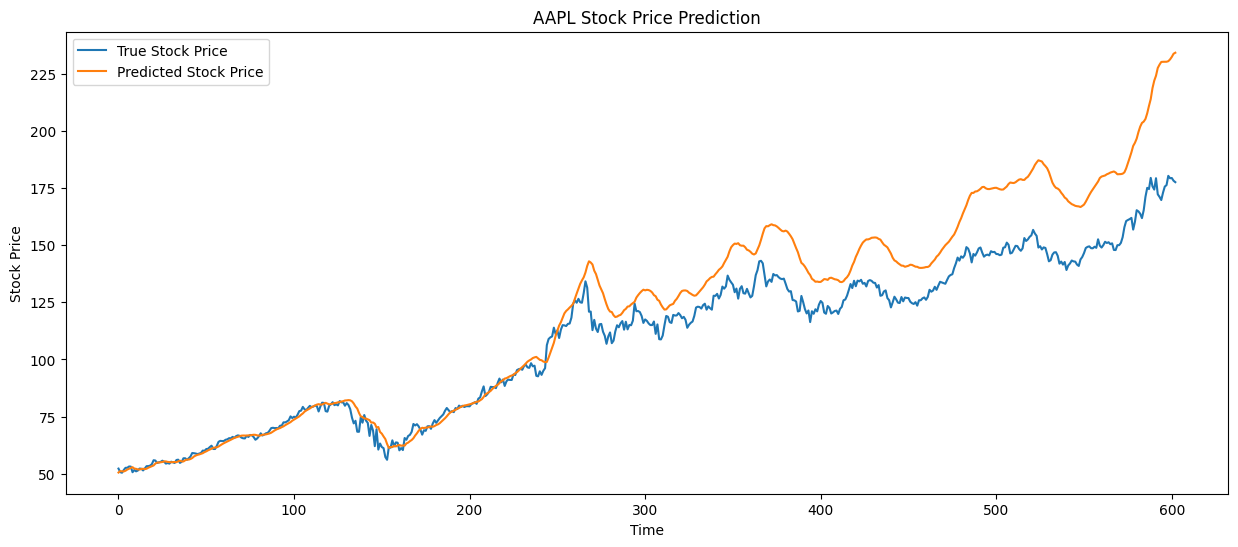

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
!pip install yfinance
import yfinance as yf
symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2022-01-01'
data = yf.download(symbol, start=start_date, end=end_date)
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
def create_sequences(data, sequence_length):
  sequences = []
  labels = []
  for i in range(len(data) - sequence_length):
    seq = data[i:i+sequence_length]
    label = data[i+sequence_length]
    sequences.append(seq)
    labels.append(label)
  return np.array(sequences), np.array(labels)
sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss:.4f}')
print(f'Testing Loss: {test_loss:.4f}')
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test)
plt.figure(figsize=(15, 6))
plt.plot(y_test_original, label='True Stock Price')
plt.plot(predictions, label='Predicted Stock Price')
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()